In [9]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [10]:
dataset_folder = '../../../datasets/'
feature_names = ["Age", "Workclass", "fnlwgt", "Education",
                         "Education-Num", "Marital Status", "Occupation",
                         "Relationship", "Race", "Sex", "Capital Gain",
                         "Capital Loss", "Hours per week", "Country", 'Income']
#features_to_use = [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
features_to_use = [0, 1, 5, 7, 8, 9, 10, 11, 12]
#categorical_features = [1, 3, 5, 6, 7, 8, 9, 10, 11, 13]
categorical_features = [1, 5, 7, 8, 9, 10, 11]
education_map = {
    '10th': 'Dropout', '11th': 'Dropout', '12th': 'Dropout', '1st-4th':
    'Dropout', '5th-6th': 'Dropout', '7th-8th': 'Dropout', '9th':
    'Dropout', 'Preschool': 'Dropout', 'HS-grad': 'High School grad',
    'Some-college': 'High School grad', 'Masters': 'Masters',
    'Prof-school': 'Prof-School', 'Assoc-acdm': 'Associates',
    'Assoc-voc': 'Associates',
}
occupation_map = {
    "Adm-clerical": "Admin", "Armed-Forces": "Military",
    "Craft-repair": "Blue-Collar", "Exec-managerial": "White-Collar",
    "Farming-fishing": "Blue-Collar", "Handlers-cleaners":
    "Blue-Collar", "Machine-op-inspct": "Blue-Collar", "Other-service":
    "Service", "Priv-house-serv": "Service", "Prof-specialty":
    "Professional", "Protective-serv": "Other", "Sales":
    "Sales", "Tech-support": "Other", "Transport-moving":
    "Blue-Collar",
}
country_map = {
    'Cambodia': 'SE-Asia', 'Canada': 'British-Commonwealth', 'China':
    'China', 'Columbia': 'South-America', 'Cuba': 'Other',
    'Dominican-Republic': 'Latin-America', 'Ecuador': 'South-America',
    'El-Salvador': 'South-America', 'England': 'British-Commonwealth',
    'France': 'Euro_1', 'Germany': 'Euro_1', 'Greece': 'Euro_2',
    'Guatemala': 'Latin-America', 'Haiti': 'Latin-America',
    'Holand-Netherlands': 'Euro_1', 'Honduras': 'Latin-America',
    'Hong': 'China', 'Hungary': 'Euro_2', 'India':
    'British-Commonwealth', 'Iran': 'Other', 'Ireland':
    'British-Commonwealth', 'Italy': 'Euro_1', 'Jamaica':
    'Latin-America', 'Japan': 'Other', 'Laos': 'SE-Asia', 'Mexico':
    'Latin-America', 'Nicaragua': 'Latin-America',
    'Outlying-US(Guam-USVI-etc)': 'Latin-America', 'Peru':
    'South-America', 'Philippines': 'SE-Asia', 'Poland': 'Euro_2',
    'Portugal': 'Euro_2', 'Puerto-Rico': 'Latin-America', 'Scotland':
    'British-Commonwealth', 'South': 'Euro_2', 'Taiwan': 'China',
    'Thailand': 'SE-Asia', 'Trinadad&Tobago': 'Latin-America',
    'United-States': 'United-States', 'Vietnam': 'SE-Asia'
}
married_map = {
    'Never-married': 'Never-Married', 'Married-AF-spouse': 'Married',
    'Married-civ-spouse': 'Married', 'Married-spouse-absent':
    'Separated', 'Separated': 'Separated', 'Divorced':
    'Separated', 'Widowed': 'Widowed'
}
label_map = {'<=50K': 'Less than $50,000', '>50K': 'More than $50,000'}

def cap_gains_fn(x):
    x = x.astype(float)
    d = np.digitize(x, [0, np.median(x[x > 0]), float('inf')],
                    right=True).astype('|S128')
    return utils.map_array_values(d, {'0': 'None', '1': 'Low', '2': 'High'})

transformations = {
    3: lambda x: utils.map_array_values(x, education_map),
    5: lambda x: utils.map_array_values(x, married_map),
    6: lambda x: utils.map_array_values(x, occupation_map),
    10: cap_gains_fn,
    11: cap_gains_fn,
    13: lambda x: utils.map_array_values(x, country_map),
    14: lambda x: utils.map_array_values(x, label_map),
}
dataset = utils.load_csv_dataset(
    os.path.join(dataset_folder, 'adult/adult.data'), -1, ', ',
    feature_names=feature_names, features_to_use=features_to_use,
    categorical_features=categorical_features, discretize=True,
    balance=True, feature_transformations=transformations)


print(dataset.train[0])

[3. 6. 2. 0. 4. 1. 2. 0. 1.]


In [11]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 100
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print(dm.space_size())
explainer = ae.ArgTabularExplainer(dm, 'adultshort_' + str(nb_rows), compute=True, output_path='../../saves')
tb = testbench.Testbench(dm)

# tb.explore_full_dataset(16)
# tb.explore_neighborhoods(16)

Train 0.96
Test 0.7061822817080943
408240
adultshort_100
Generating arguments
len  1 : 5 ,  6
36 potential arg checked ( 0 not minimal)
len  2 : 27 ,  37
233 potential arg checked ( 130 not minimal)
len  3 : 36 ,  23
576 potential arg checked ( 986 not minimal)
len  4 : 21 ,  5
878 potential arg checked ( 2718 not minimal)
len  5 : 2 ,  0
814 potential arg checked ( 4096 not minimal)
len  6 : 0 ,  0
457 potential arg checked ( 3672 not minimal)
len  7 : 0 ,  0
144 potential arg checked ( 1967 not minimal)
len  8 : 0 ,  0
20 potential arg checked ( 585 not minimal)
len  9 : 0 ,  0
0 potential arg checked ( 75 not minimal)
Total number of arguments:  162
Saving to  ../../saves\adultshort_100_minimals.df


In [13]:
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'adultshort_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))

Train 0.832283778397768
Test 0.8017845761631612
adultshort_1254
Total number of arguments:  1019
Saving to  ../../saves\adultshort_1254_minimals.df
edges per node: 117.13444553483808
nodes: 1019
edges: 59680
adultshort_2508
Total number of arguments:  1572
Saving to  ../../saves\adultshort_2508_minimals.df
edges per node: 145.77735368956743
nodes: 1572
edges: 114581
adultshort_3762
Total number of arguments:  1867
Saving to  ../../saves\adultshort_3762_minimals.df
edges per node: 152.7198714515265
nodes: 1867
edges: 142564
adultshort_5016
Total number of arguments:  2089
Saving to  ../../saves\adultshort_5016_minimals.df
edges per node: 153.30397319291527
nodes: 2089
edges: 160126
adultshort_6270
Total number of arguments:  2296
Saving to  ../../saves\adultshort_6270_minimals.df
edges per node: 159.4451219512195
nodes: 2296
edges: 183043
adultshort_7524
Total number of arguments:  2404
Saving to  ../../saves\adultshort_7524_minimals.df
edges per node: 162.70965058236274
nodes: 2404
edg

[256814, 274441, 59680, 114581, 142564, 160126, 183043, 195577, 219286]
(1254, 2508, 3762, 5016, 6270, 7524, 8778, 11286, 12545) (1019, 1572, 1867, 2089, 2296, 2404, 2628, 2955, 3163)


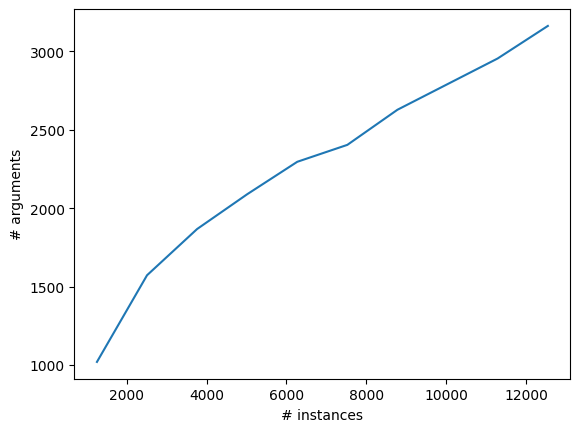

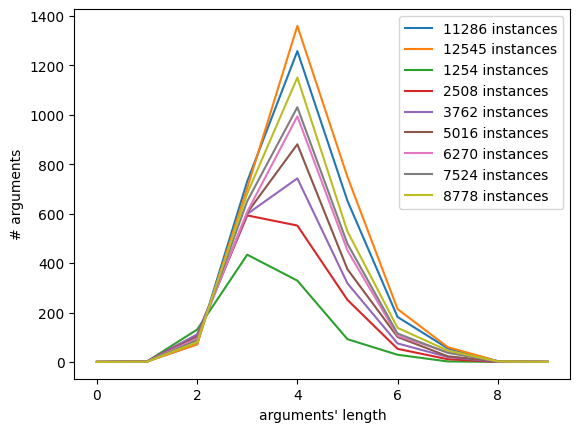

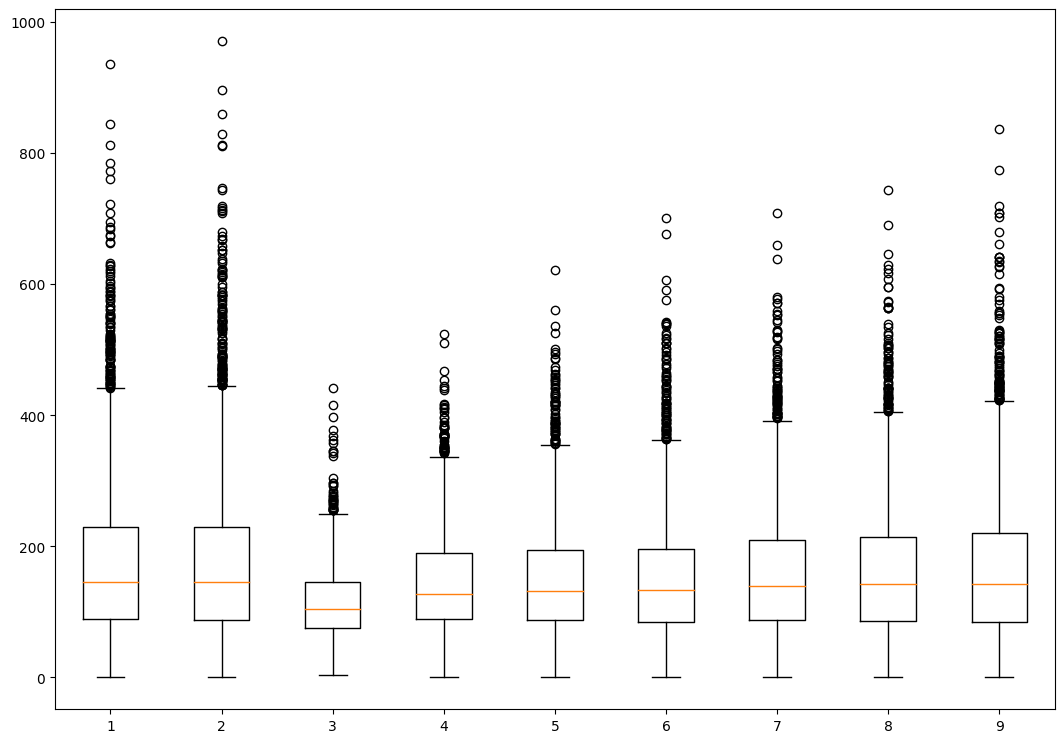

(12545, 11286, 8778, 7524, 6270, 5016, 3762, 2508, 1254) (0.002845399936768911, 0.0023688663282571687, 0.0015220700152207556, 0.0008319467554076532, 0.0008710801393728707, 0.0009573958831976537, 0.0005356186395286677, 0.0006361323155216203, 0.0)


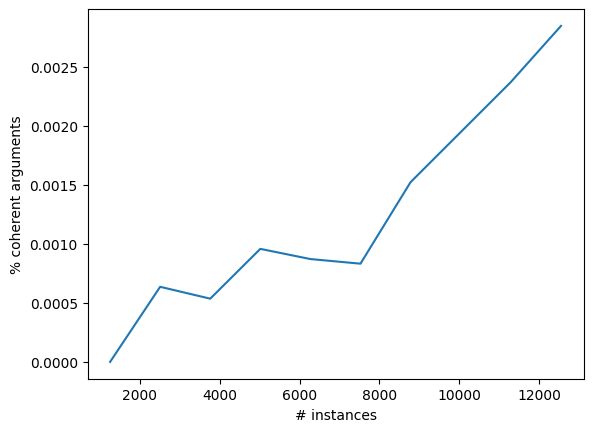

In [15]:
explainer.af_analysis(remove=['adult_', '100', '110', '8505', '17010', '25515', '34020', '42525', '51030', '59535', '68040', '76545', '85050', '93555', '102060', '110565', '119070', '127575', '136080'])

In [9]:
#ext_gen = explainer.extension_generator_from_graph()
ext_gen = explainer.extension_generator_from_sat(file='../../saves/adultshort_100_sat.txt')
#max_covi_ext = explainer.make_selection('max_covi_incl', ext_gen)
max_covi_ext = explainer.make_selection('max_card', ext_gen)
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations(verbose=True)

Using pre-processed file...
Reading ../../saves/adultshort_100_sat_preprocessed.txt
Time for selection:  4.993837594985962
Len max_cov_exts:  1
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 13 Arg 1/5: frozenset({'Sex_Female', 'Relationship_Not-in-family', 'Workclass_State-gov'})
id: 2 coverage: 12 Arg 1/8: frozenset({'Sex_Female', 'Age_Age > 48.00', 'Capital Loss_0', 'Hours per week_Hours per week <= 40.00', 'Capital Gain_0'})
id: 3 coverage: 17 Arg 1/8: frozenset({'Relationship_Not-in-family', 'Age_28.00 < Age <= 37.00', 'Race_White'})
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 0 Arg 1/0: None
id: 6 coverage: 10 Arg 1/11: frozenset({'Capital Gain_0', 'Marital Status_Divorced', 'Age_37.00 < Age <= 48.00'})
id: 7 coverage: 0 Arg 1/0: None
id: 8 coverage: 12 Arg 1/9: frozenset({'Marital Status_Divorced', 'Age_Age > 48.00', 'Sex_Male'})
id: 9 coverage: 0 Arg 1/0: None
id: 10 coverage: 0 Arg 1/0: None
id: 11 coverage: 0 Arg 1/0: None
id: 12 coverage: 16 Arg 1/4: frozenset({'Age_Age